# Kmeans by observations

In [2]:
%matplotlib inline
import sys
sys.path.insert(1,'../Utilities')
# notebook
import matplotlib.pylab as pylab
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.cluster import KMeans
from collections import Counter
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import networkx as nx
from math import sin, cos, sqrt, atan2, radians
from utils import *
from data import *
from resObsMeta import *
import seaborn as sns
#make the graphs bigger
pylab.rcParams['figure.figsize'] = (32.0, 24.0)
pylab.rcParams['font.size'] = 24

In [3]:
allLocs = []
dc = getIntersectionBetweenNBNAndNames()
kz = dc.keys()
for key in kz:
    listOfLocs = dc[key]
    listOfLocs = list(map(lambda x: [x[0],x[1]], listOfLocs))
    allLocs.extend(listOfLocs)

allLocs = np.array(allLocs)

C:\Users\davie\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DtypeWarning: Columns (9,22) have mixed types.Specify dtype option on import or set low_memory=False.
  


In [4]:
data = eiggRawData()
data.head()

C:\Users\davie\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: DtypeWarning: Columns (9,22) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Recorder,Latitude (WGS84),Longitude (WGS84),Start date year,End date year,Scientific name,Common name
0,unknown,56.902729,-6.15936,1905,NaN,Meloe violaceus,Violet Oil-beetle
1,Frank Balfour-Browne,56.899200,-6.19759,1910,1910.0,Rhantus suturellus,NaN
2,Frank Balfour-Browne,56.899200,-6.19759,1910,1910.0,Gyrinus substriatus,NaN
3,Frank Balfour-Browne,56.899200,-6.19759,1910,1910.0,Enochrus fuscipennis,NaN
4,Frank Balfour-Browne,56.899200,-6.19759,1910,1910.0,Boreonectes multilineatus,NaN


In [5]:
df = data[['Latitude (WGS84)', 'Longitude (WGS84)', 'Start date year']]

df = df.dropna(subset=['Latitude (WGS84)'])
df = df.dropna(subset=['Longitude (WGS84)'])
df["Latitude (WGS84)"] = df["Latitude (WGS84)"].astype(np.float32)
df["Longitude (WGS84)"] = df["Longitude (WGS84)"].astype(np.float32)
df = df[['Latitude (WGS84)', 'Longitude (WGS84)']]

In [6]:
latBoundaries = (min(df["Latitude (WGS84)"]),max(df["Latitude (WGS84)"]))
lonsBoundaries = (min(df['Longitude (WGS84)']),max(df['Longitude (WGS84)']))

In [7]:
res = list(zip(df["Latitude (WGS84)"], df['Longitude (WGS84)']))
kmeans = KMeans(n_clusters=3, random_state=0).fit(res)
centers = kmeans.cluster_centers_

In [8]:
def locationsPerPerson():
    residences = {}

    residences['mairi mckinnon'] = '56.9018832,-6.1449375' # https://sjsa.wordpress.com/tag/eigg/s
    residences['neil robertson'] = '56.922044,-6.1446842'
    residences['kenneth kean'] = '56.8778059,-6.1337137' # https://beta.companieshouse.gov.uk/company/SC554221/officers, http://isleofeigg.org/accommodation/the-smiddy/
    residences['bob wallace'] = '56.8804647,-6.1417635' # PROBABLY NOT REAL ADDRESS => https://beta.companieshouse.gov.uk/officers/x-151T1pEie2etTsFQ-zjg9LejI/appointments
    residences['george carr'] = '56.9131675,-6.1619473'
    residences['john booth'] = '56.878903, -6.146895' #https://beta.companieshouse.gov.uk/company/SC170339/officers => I presume it means Galmisdale House
    residences['alex boden'] = '56.8849159,-6.1415287'
    residences['eddie scott'] = '56.9222615,-6.1420233'
    residences['pascal carr'] = '56.918268, -6.154348'    
    residences['stuart millar'] = '56.9269519,-6.1439637'
    residences['colin carr'] = '56.8889489,-6.1250917'
    residences['marie carr'] = '56.8889489,-6.1250917'
    residences['simon helliwell'] = '56.8902145,-6.1343823' #ok technically they USED to live here, but thats fine since thats when a lot of observations will overlap anyway
    residences['karen helliwell'] = '56.8902145,-6.1343823'
    residences['katrin bach'] = '56.9113759,-6.1654777' # https://en-gb.facebook.com/EiggyBread/
    
    return residences

orgLocs = locationsPerPerson().values()
orgLocs = toUsableLatLonList(orgLocs)

In [9]:
orgLocs

[[56.9018832, -6.1449375],
 [56.922044, -6.1446842],
 [56.8778059, -6.1337137],
 [56.8804647, -6.1417635],
 [56.9131675, -6.1619473],
 [56.878903, -6.146895],
 [56.8849159, -6.1415287],
 [56.9222615, -6.1420233],
 [56.918268, -6.154348],
 [56.9269519, -6.1439637],
 [56.8889489, -6.1250917],
 [56.8889489, -6.1250917],
 [56.8902145, -6.1343823],
 [56.8902145, -6.1343823],
 [56.9113759, -6.1654777]]

IndexError: too many indices for array

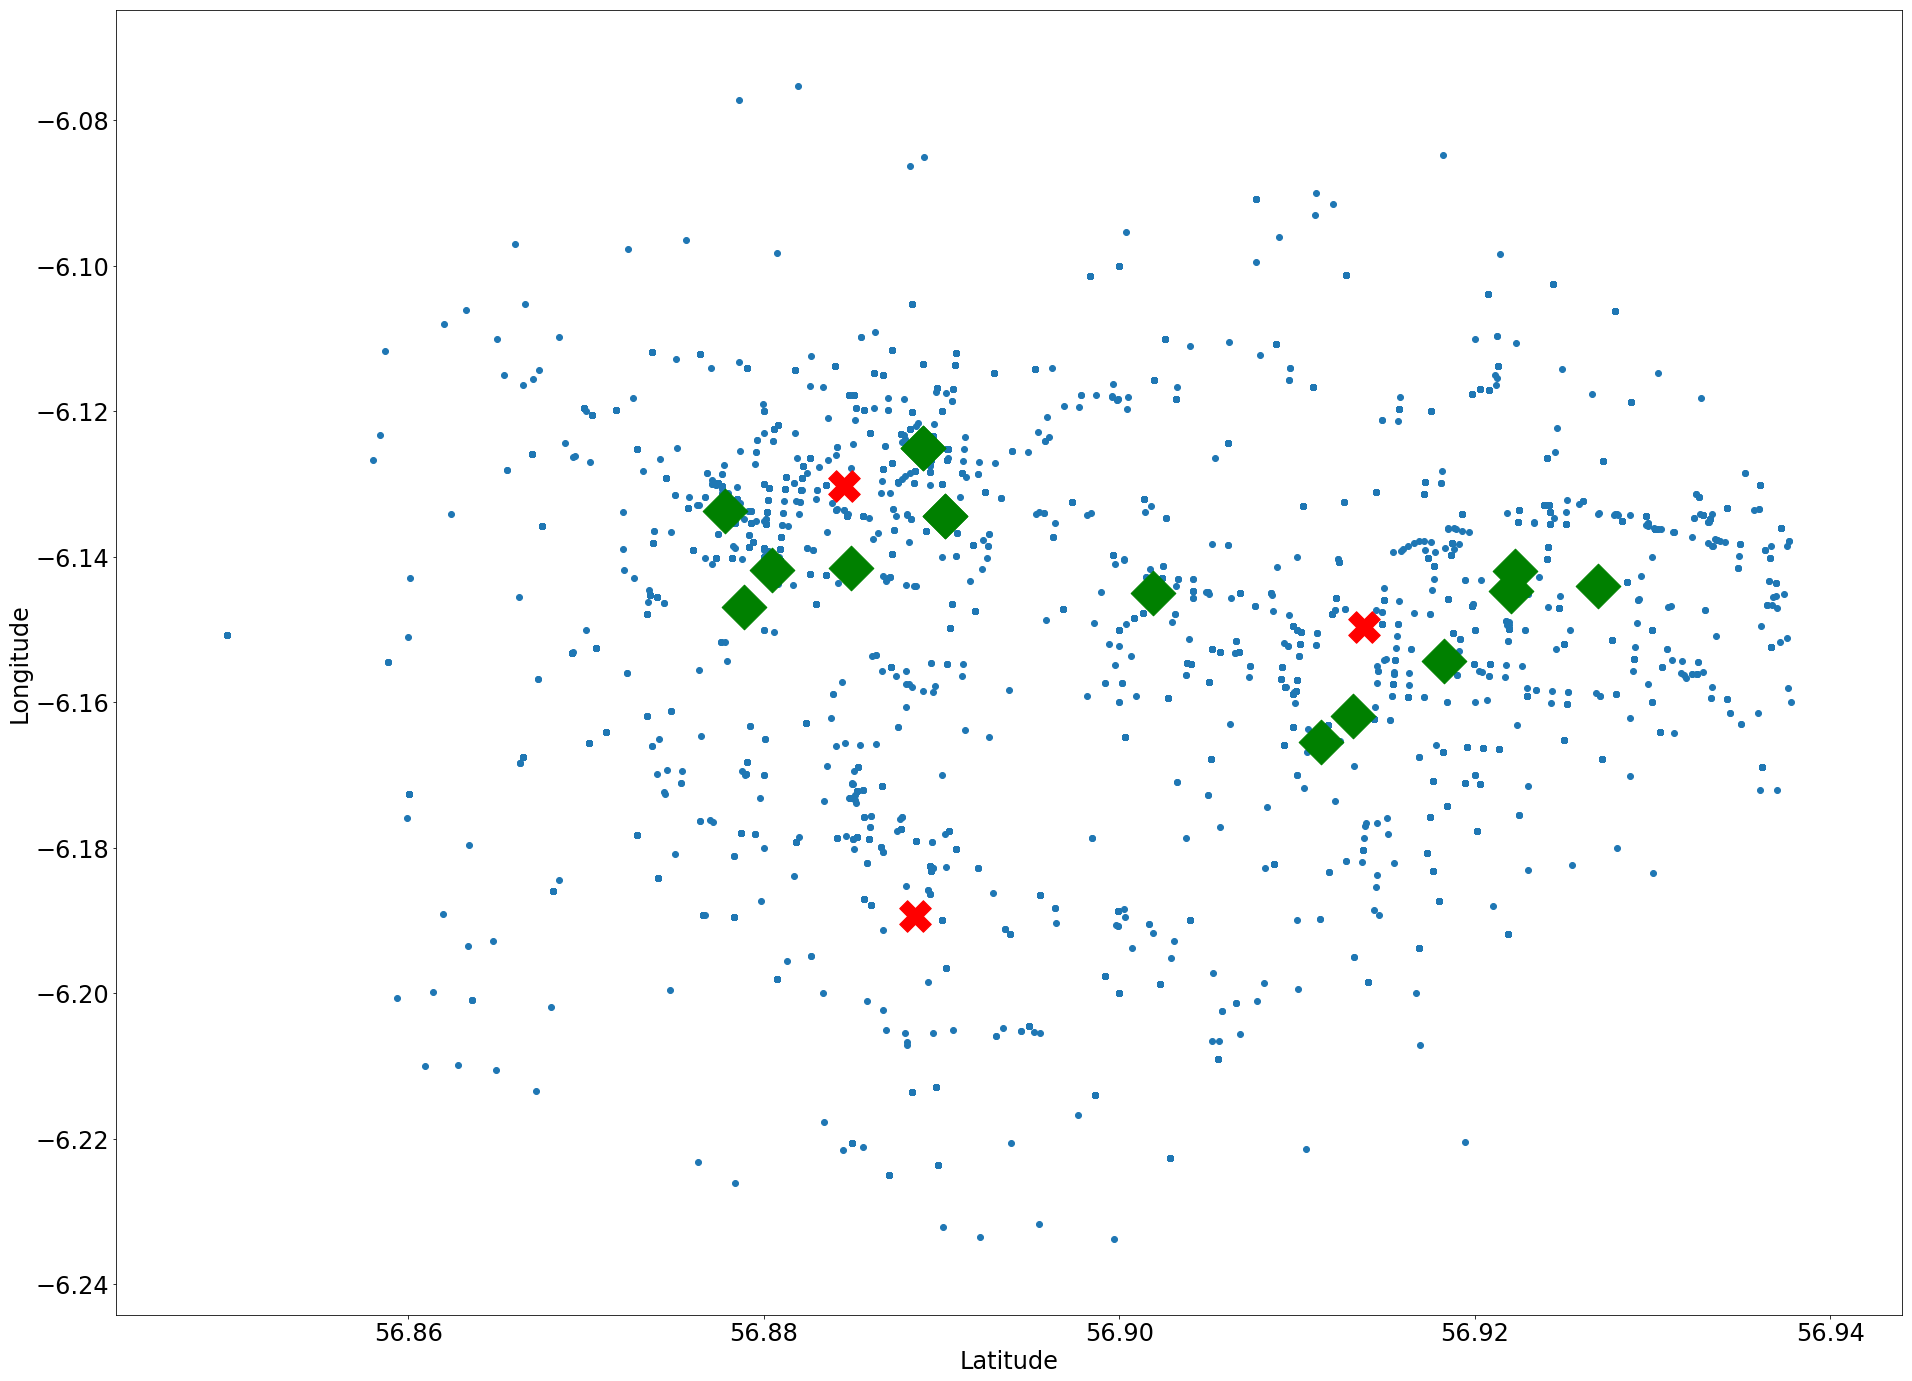

In [12]:
fig,ax = plt.subplots(1,1)
obs = ax.scatter(df["Latitude (WGS84)"], df['Longitude (WGS84)'])
plt.ylabel("Longitude")
plt.xlabel("Latitude")
cc = ax.scatter(centers[:,0],centers[:,1],c="red",marker="X", s=1000)
people = ax.scatter(np.array(orgLocs)[:,0],np.array(orgLocs)[:,1],c="green",marker="D", s=1000)
theirObs = ax.scatter(allLocs[:,0],allLocs[:,1],c="purple",marker="X", s=300)

plt.legend((obs,cc,people,theirObs),
           ('Species','Species Centres','Observer houses',"Residents' Observations" ),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=28)

In [12]:
centers_resolved = list(map(lambda x: [float(x[0]+56),float(-1*x[1] - 6)], centers))
df["Longitude (WGS84)"] = -1*(df["Longitude (WGS84)"]) - 6
df["Latitude (WGS84)"] = df["Latitude (WGS84)"] + 56
centers_resolved,centers

([[56.9137464010401, -6.149630483122071],
  [56.88451345636635, -6.130256620064351],
  [56.88851328294958, -6.189420568910292]],
 array([[0.9137464 , 0.14963048],
        [0.88451346, 0.13025662],
        [0.88851328, 0.18942057]]))

In [13]:
processedCoordsList = list(zip(df["Latitude (WGS84)"],df['Longitude (WGS84)']))[1:1000]
processedCoordsList = list(map(lambda x: list(map(lambda y: float(y),x)),processedCoordsList)) #convert from numpy to python float
generateMapJSON([('./fullColMarkers/marker2.png', processedCoordsList), ('./fullColMarkers/marker73.png',centers_resolved)],[], "kmeansClusters.txt")

# Clusters on hotels

In [113]:
def listedEiggHotelRatings():
    hotelRatings = {}
    
    # *************  FORMAT  ***************
    # hotelRatings["NameOfHotel"] = [TripAdvisor/AirBnb Mean, Google Review Mean, FB likes]
    # =>  UNIQUE ID = [Populist rating, Accessibility rating, Popularity rating]
    
    #CAUTION ON SOCKPUPPETING
    
    hotelRatings["Tigh an Sithean – camping cabins & log cabins"] = [(3.75,4),(0,0),0]
    hotelRatings["Lageorna"] = [(4.87,75),(5,16),725]
    hotelRatings["Tophouse"] = [(0,0),(0,0),0]
    hotelRatings["Amazing Eigg Shed"] = [(4.91,105),(0,0),0]
    hotelRatings["Eigg Organics"] = [(1,1),(4.80,14),0]
    hotelRatings["Kildonnan house"] = [(4.89,36),(5,5),279]
    hotelRatings["Laig Caravan"] = [(4.9,39),(0,0),333]
    hotelRatings["Glebe Barn"] = [(4.84,45),(4.9,31),440]
    hotelRatings["The Smiddy"] = [(5,16),(4.5,2),0]
    hotelRatings["Sweeney's Bothy"] = [(5,57),(0,0),0]
    hotelRatings["Laig Beach Bothy"] = [(0,0),(0,0),0]
    hotelRatings["Eigg Camping Pods"] = [(0,0),(5,10),705]
    hotelRatings["Tigh Eilidh"] = [(5,16),(4,1),34]
    hotelRatings["Eigg Eco Centre"] = [(0,0),(5,3),0]
    hotelRatings["Clanranald college"] = [(0,0),(0,0),0]
    hotelRatings["Howlin Cottege"] = [(0,0),(5,2),0]
   
    return hotelRatings

def scoreIndividualHotelRating(rating):
    tripAdvisor, googleReview, facebookLiked = rating
    
    tripAdvisorStars, numTripAdvisorRatings = tripAdvisor
    googleStars, numGoogleReviews = googleReview
    
    overallReviews = (numTripAdvisorRatings + numGoogleReviews + facebookLiked)
    overallReviews = overallReviews / 5
    overallReviews += 10    
    return 8*overallReviews

def scoreHot(x):
    try:
        f = listedEiggHotelRatings()[x]
        return scoreIndividualHotelRating(f)
    except:
        return 200

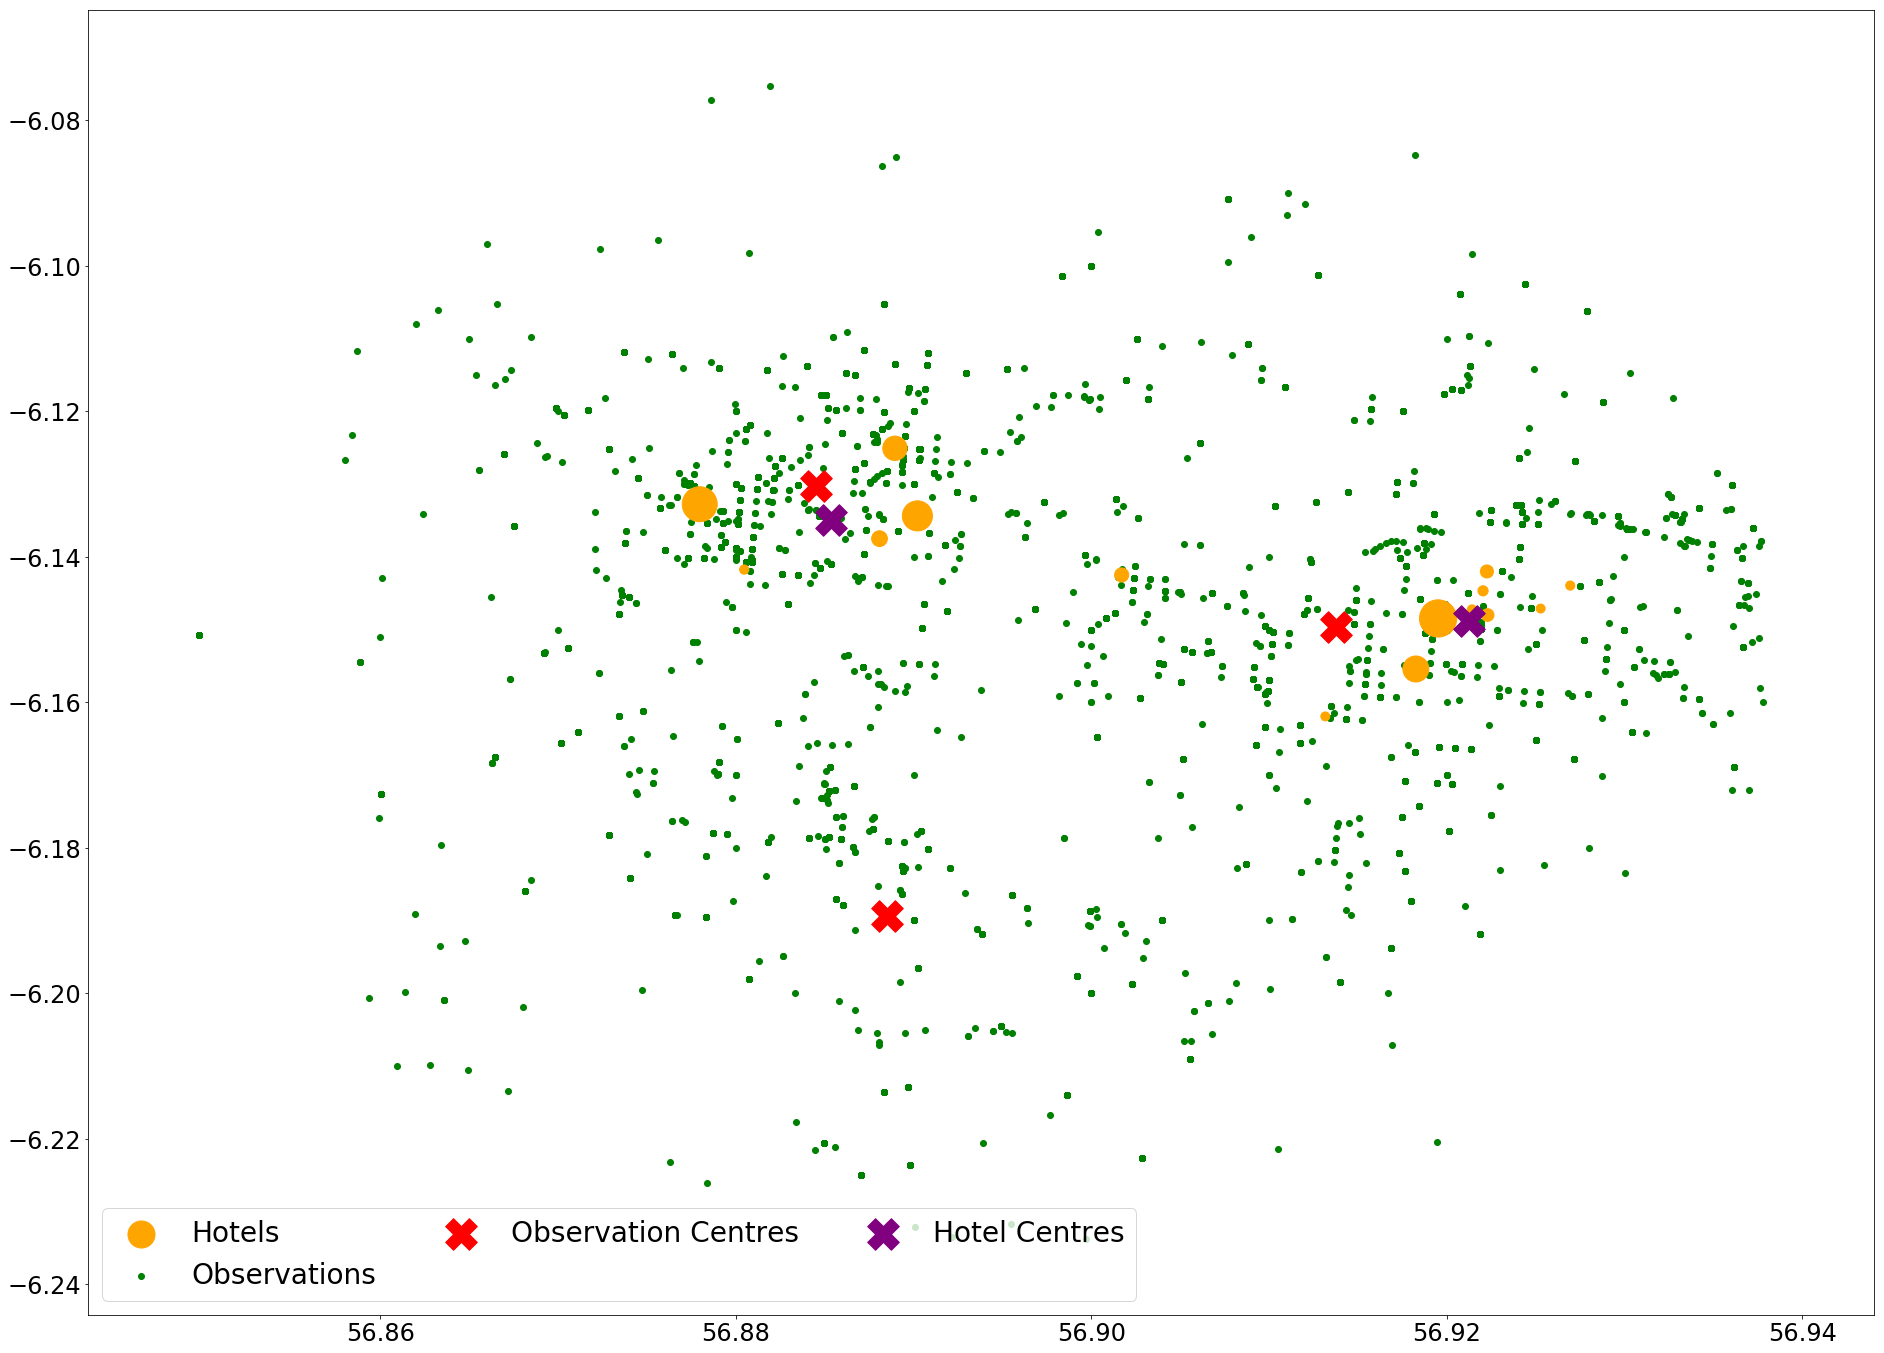

In [114]:
hotelsDct = listedEiggHotels()
hotels = hotelsDct.keys()

scores = list(map(lambda x: scoreHot(hotelsDct[x]), hotels))

hotels = toUsableLatLonList(hotels)
lats = list(map(lambda x: x[0], hotels))
lons = list(map(lambda x: x[1], hotels))
lats,lons

kmeanss = KMeans(n_clusters=2, random_state=0).fit(list(zip(lats,lons)))
centersHotels = kmeanss.cluster_centers_

res = list(zip(df["Latitude (WGS84)"], df['Longitude (WGS84)']))
kmeans = KMeans(n_clusters=3, random_state=0).fit(res)
centers = kmeans.cluster_centers_

# df["Latitude (WGS84)"] = df["Latitude (WGS84)"] - 56
fig,ax = plt.subplots(1,1)
obs = ax.scatter(df["Latitude (WGS84)"], df['Longitude (WGS84)'],c='green')
hto = ax.scatter(lats,lons,c='orange',s=scores)

cc1 = ax.scatter(centers[:,0],centers[:,1],c="red",marker="X", s=1000)
cc2 = ax.scatter(centersHotels[:,0],centersHotels[:,1],c="purple",marker="X", s=1000)

plt.legend((hto,obs,cc1,cc2),
           ('Hotels','Observations','Observation Centres','Hotel Centres'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=28)